In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = r'C:\Users\sshri\Desktop\Customer\train_bookings_2000.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train sheet')
booking_data = pd.read_excel(file_path, sheet_name='booking sheet')


In [3]:
combined_data = pd.merge(train_data, booking_data, on='Train Number')


In [4]:
combined_data.ffill(inplace=True)
combined_data['Arrival Time'] = pd.to_datetime(combined_data['Arrival Time'], format='%H:%M').dt.time


In [5]:
train_popularity = combined_data.groupby('Train Name')['Seats Available'].mean().sort_values(ascending=False)
print("Train Popularity (Average Seats Available):\n", train_popularity)


Train Popularity (Average Seats Available):
 Train Name
Express 36      185.0
Fastline 22     164.0
Regional 35     141.0
Intercity 52    124.0
Rapid 153        87.0
Intercity 46     84.0
Name: Seats Available, dtype: float64


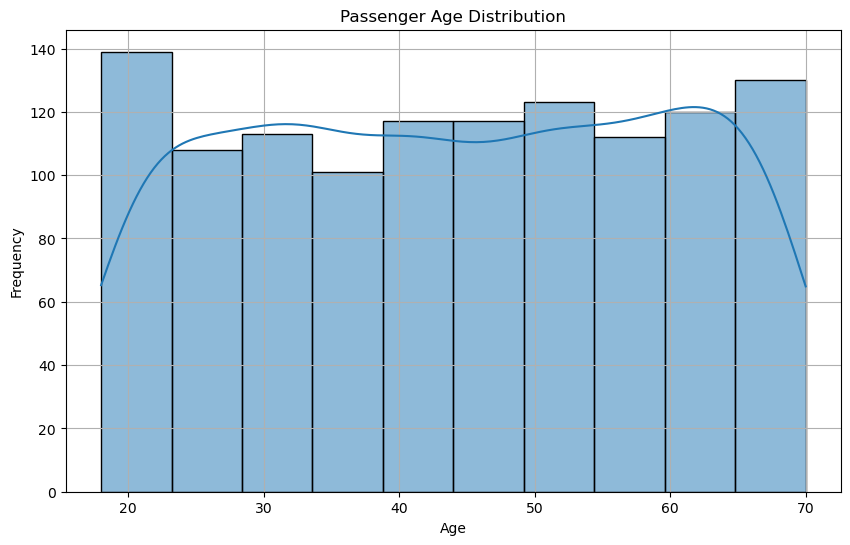

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Age'], bins=10, kde=True)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [7]:
booking_status = combined_data['Booking Status'].value_counts()
print("Booking Status Counts:\n", booking_status)

canceled_trains = combined_data[combined_data['Booking Status'] == 'Cancelled'].groupby('Train Number').size().sort_values(ascending=False)
print("Canceled Trains:\n", canceled_trains)

top_booked_trains = combined_data['Train Name'].value_counts().head(5)
print("Top 5 Booked Trains:\n", top_booked_trains)


Booking Status Counts:
 Booking Status
Cancelled    607
Confirmed    573
Name: count, dtype: int64
Canceled Trains:
 Train Number
101    212
105    190
102    114
104     91
dtype: int64
Top 5 Booked Trains:
 Train Name
Express 36      205
Intercity 46    205
Fastline 22     201
Intercity 52    192
Rapid 153       192
Name: count, dtype: int64


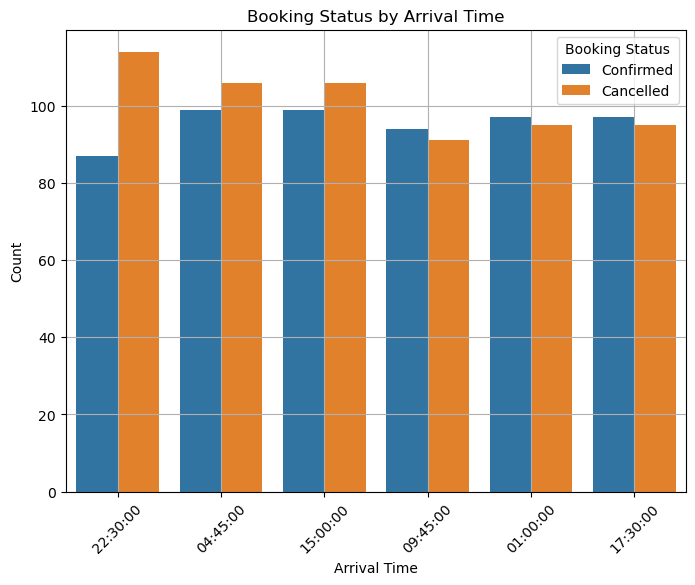

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data, x='Arrival Time', hue='Booking Status')
plt.title('Booking Status by Arrival Time')
plt.xticks(rotation=45)
plt.xlabel('Arrival Time')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.grid()
plt.show()


In [17]:
# Total Number of Bookings
total_bookings = combined_data.shape[0]
print(f"Total Number of Bookings: {total_bookings}")


Total Number of Bookings: 1180


In [18]:
# Booking Status Percentage
booking_status_percentage = booking_status / total_bookings * 100
print("Booking Status Percentage:\n", booking_status_percentage)


Booking Status Percentage:
 Booking Status
Cancelled    51.440678
Confirmed    48.559322
Name: count, dtype: float64


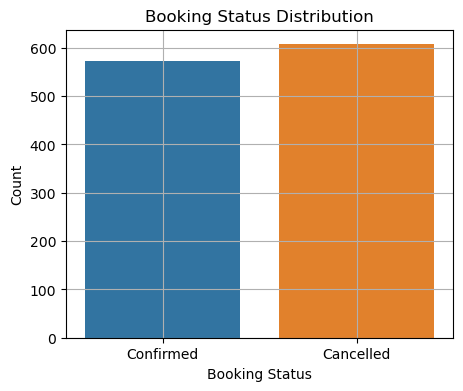

Total Number of Bookings: 1180
Booking Status Percentage:
 Booking Status
Cancelled    51.440678
Confirmed    48.559322
Name: count, dtype: float64


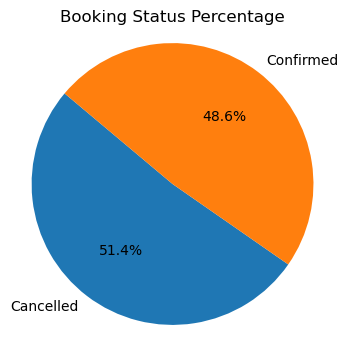

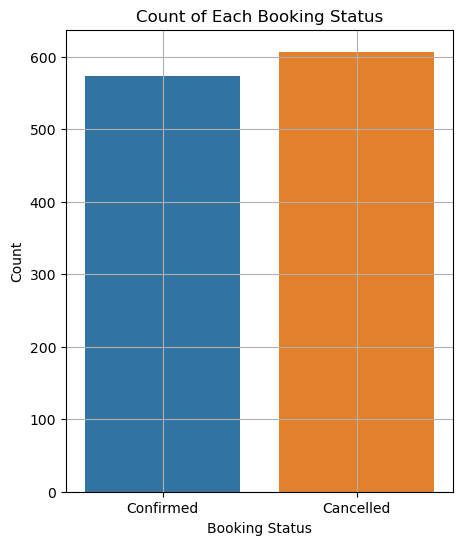

In [22]:
# 10. Visualization: Booking Status Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='Booking Status', data=combined_data)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.grid()
plt.show()

# Total Number of Bookings
total_bookings = combined_data.shape[0]
print(f"Total Number of Bookings: {total_bookings}")

# Booking Status Percentage
booking_status_percentage = booking_status / total_bookings * 100
print("Booking Status Percentage:\n", booking_status_percentage)

# Visualization: Booking Status Percentage
plt.figure(figsize=(4, 4))
plt.pie(booking_status_percentage, labels=booking_status_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Booking Status Percentage')
plt.axis('equal')
plt.show()

# Count of Each Booking Status
plt.figure(figsize=(5, 6))
sns.countplot(x='Booking Status', data=combined_data)
plt.title('Count of Each Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.grid()
plt.show()
